# Usikkerhetsanalyse av Biot-Savarts lov

## FY1003 Elektrisitet og magnetisme

### Laboratorieøvelse 2 Statisk magnetfelt

#### Norges Teknisk-Naturvitenskapelige Universitet

Av Håkon W. Ånes

Dato: 2018-02-18

___

**Mål:** Plotte målt og beregnet $B(x)$ i hver posisjon $x$ med beregnet usikkerhet for de fem geometriene kort spole, helmholtzspole ($a = (2R, R, R/2)$) og solenoide.

**Fremgangsmåte:**
1. Ser på usikkerhetsbidraget til $\Delta B$ fra hver av variablene som inngår i Biot-Savarts lov ved å benytte Gauss' feilforplantningslov.
2. Partiellderiverer hvert uttrykk ved bruk av Python-biblioteket `sympy`.
3. Setter dette som usikkerhet for den beregnede kurven.
4. Plotter måledata og beregnet kurve med $\pm$ to ganger beregnet usikkerhet (analogt med to standardavvik).

Noe av `sympy`s funksjoner benyttet i denne notebooken finnes her [http://docs.sympy.org/latest/tutorial/calculus.html#](http://docs.sympy.org/latest/tutorial/calculus.html#). 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


# Initialiserer pen visning av uttrykkene
sp.init_printing()

# Plotteparametre for å få store, tydelige plott som utnytter tilgjengelig skjermareal
fontsize = 20
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (16, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

In [2]:
# Definerer variablene som inngår i uttrykkene for Biot-Savarts lov for alle geometriene
mu0, I, R, N, l, x, z = sp.symbols('mu0 I R N l x z')

# Kort spole

Lager uttrykk for Biot-Savarts lov for kort spole og skriver til skjerm.

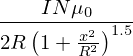

In [3]:
kort_spole = (N*I*mu0)/(2*R)*(1 + (x/R)**2)**(-3/2)
kort_spole

Da partiellderiverer vi med hensyn på f.eks. $x$, $I$ og $R$ og legger uttrykkene i en liste. For å sjekke om det faktisk er så lett som det ser ut skriver vi $\partial B/\partial I$ til skjerm.

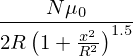

In [4]:
dBbd = [sp.diff(kort_spole, x), sp.diff(kort_spole, I), sp.diff(kort_spole, R)]
dBbd[1]

Suksess!

For å finne usikkerheter $\Delta B(x)$ for den beregnede kurven lager vi et array med avstander $x_\mathrm{i}$ tilsvarende måleposisjonene, og korrigerer posisjonene iht. spolens midtplan. Vi lager også en beregnet kurve fra Biot-Savarts lov. I tillegg skriver vi eksperimentelle måleposisjoner og magnetfeltstyrker til arrayer.

In [5]:
# Eksperimentelle måleposisjoner
xe = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14,
               0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28,
               0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
               0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5])

# For beregnet kurve
xb = np.linspace(0.01, 0.5, 200)

# Måleposisjonene er absolutte posisjoner avlest fra linjal. Spolens midtplan er i x = 0.30 m, og
# vi må korrigere for dette.
x0 = 0.30
xe -= x0
xb -= x0

# Eksperimentelle magnetfeltstyrker
Be = np.array([0.22, 0.26, 0.3, 0.36, 0.42, 0.49, 0.58, 0.67, 0.79, 0.92, 1.09, 1.27, 1.51, 1.79,
               2.14, 2.57, 3.1, 3.75, 4.58, 5.62, 6.97, 8.59, 10.74, 13.3, 16.36, 19.85, 23.41,
               26.57, 27.76, 28.71, 29.2, 29.26, 28.91, 28.13, 26.97, 25.52, 22.19, 18.53, 15.21,
               12.31, 9.96, 8.04, 6.47, 5.26, 4.31, 3.51, 2.9, 2.41, 2.02, 1.7, 1.43, 1.21, 1.03,
               0.87])

# Beregnede magnetfeltstyrker i Gauss (ganger med 10**4)
Bb = [kort_spole.subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07), (x, xbi)])*1e4
      for xbi in xb]

# Gjør om hvert element i Bb til numpy float-verdier
Bb = np.array(Bb).astype(np.float64)

Spesifiserer så tenkte usikkerheter for variablene (ikke bruk disse, tenk ut dine egne!), beregner usikkerheter med Gauss' feilforplantningslov

$$
\Delta B_\mathrm{b} = \sqrt{\left(\frac{\partial B_\mathrm{b}}{\partial x_\mathrm{b}} \cdot \Delta x_\mathrm{b}\right)^2
+ \left(\frac{\partial B_\mathrm{b}}{\partial I} \cdot \Delta I\right)^2
+ \left(\frac{\partial B_\mathrm{b}}{\partial R} \cdot \Delta R\right)^2}.
$$

og plotter resultatene.

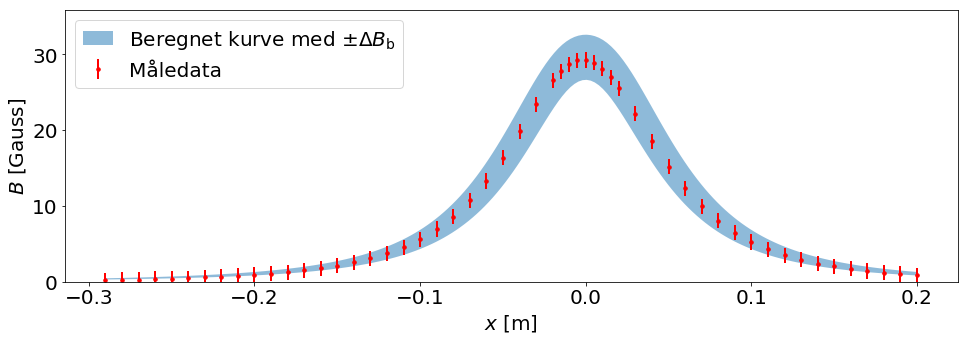

In [6]:
# Usikkerheter for beregnet kurve (tenk ut disse selv, valg av disse må begrunnes i rapporten!)
deltaxb = 0.01  # [m]
deltaIb = 0.01  # [A]
deltaRb = 0.007  # [m]

# Legger dem i en liste i samme rekkefølge (! VIKTIG!) som dBed
deltas = [deltaxb, deltaIb, deltaRb]

# Oppdiktet usikkerhet for gaussmeteret for eksperimentelle måledata (finnes ved å følge
# prosedyren i 3.3.4 i labheftet)
deltaBe = 1  # [Gauss]

# Definerer et array av samme form som Be
deltaBb = np.zeros(xb.shape)

# Beregner usikkerhetene for hver av måleposisjonene. Én iterasjon, én deltaB(x_i).
for i in range(len(xb)):
    
    # Benytter list comprehension her, se f.eks.
    # https://www.pythonforbeginners.com/basics/list-comprehensions-in-python
    # Eksempel syntaks: variabel = [en operasjon for i in range(3)]
    # Hva vi gjør (fra innerst til ytterst i linjen):
    #   1. Med dBkd[j].subs() bytter vi ut variablene N, I, mu0, R og x med tallverdier. x endrer seg
    #      for hver i-iterasjon i den ytre løkken.
    #   2. Kvadrerer
    #   3. Summerer de tre leddene ()^2
    deltaBb[i] = np.sum([(dBbd[j].subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07),
                                        (x, xb[i])])*deltas[j])**2 for j in range(len(deltas))])
    # Så tar vi roten og gjør om fra Tesla til Gauss
    deltaBb[i] = np.sqrt(deltaBb[i])*1e4
    
# Plotter
plt.fill_between(xb, Bb - 1*deltaBb, Bb + 1*deltaBb,
                 label='Beregnet kurve med $\pm \Delta B_\mathrm{b}$', alpha=0.5)
plt.errorbar(xe, Be, yerr=deltaBe, fmt='r.', label='Måledata')
plt.ylim([0, 1.1*np.max(Bb + deltaBb)])
plt.xlabel('$x$ [m]')
plt.ylabel('$B$ [Gauss]')
plt.legend(loc='upper left');

Her har vi plottet måledata og beregnet kurve med en usikkerhet, altså benytter vi et konfidensintervall på 68% ([https://en.wikipedia.org/wiki/Confidence_interval](https://en.wikipedia.org/wiki/Confidence_interval)), dvs. at vi med 68% sannsynlighet kan si at magnetfeltstyrkens "sanne" verdi for hver posisjon ligger innenfor det tegnede intervallet ([https://en.wikipedia.org/wiki/68-95-99.7_rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)).

Vi kan også undersøke de relative bidragene fra hver av usikkerhetene $\Delta x$, $\Delta I$ og $\Delta R$ for hver av posisjonene $x_\mathrm{i}$ til den beregnede kurven, som

$$
\frac{\left(\frac{\partial B}{\partial x}\Delta x\right)^2}{\Delta B^2},
$$

osv.

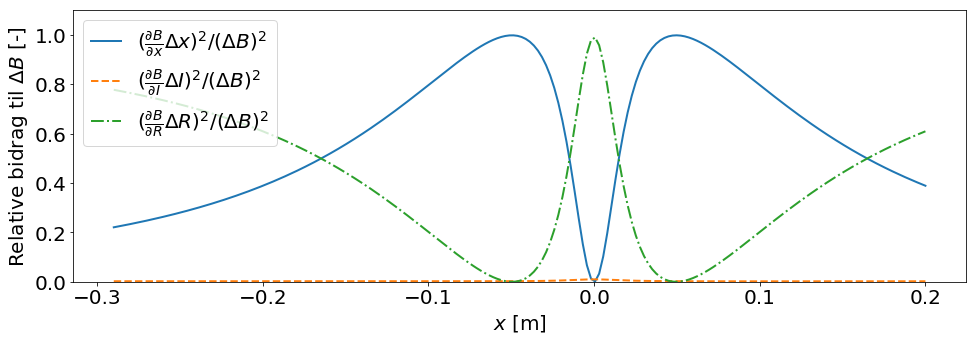

In [7]:
# Beregner bidragene
bidrag = np.zeros((len(deltas), len(xb)))
for i in range(len(deltas)):
    bidrag[i] = [dBbd[i].subs([(N, 330), (I, 1), (mu0, 4*np.pi*1e-7), (R, 0.07),
                               (x, xb[j])])*1e4*deltas[i] for j in range(len(xb))]

# Plotter bidrag til usikkerheten
plt.plot(xb, np.abs(bidrag[0])**2/deltaBb**2, '-',
         label=r'$(\frac{\partial B}{\partial x}\Delta x)^2/(\Delta B)^2$')
plt.plot(xb, np.abs(bidrag[1])**2/deltaBb**2, '--',
         label=r'$(\frac{\partial B}{\partial I}\Delta I)^2/(\Delta B)^2$')
plt.plot(xb, np.abs(bidrag[2])**2/deltaBb**2, '-.',
         label=r'$(\frac{\partial B}{\partial R}\Delta R)^2/(\Delta B)^2$')
plt.ylabel('Relative bidrag til $\Delta B$ [-]')
plt.xlabel('$x$ [m]')
plt.ylim([0, 1.1])
plt.legend(loc='upper left');

# Helmholtzspoler og solenoide

... Dette gjør dere selv. Hold tungen rett i munnen!